In [13]:
%matplotlib inline
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Rectangle, Path, PathPatch
from matplotlib.transforms import Affine2D
import matplotlib.pyplot as plt
from PIL import Image

In [10]:
![ ! -f puzzle-3.jpg ] && curl -s https://static1.squarespace.com/static/584040ffbe6594762f59f93a/t/5c3d039188251bf04667e30f/1547653668378/omoplata+6+puzzle+shlian.jpg -o puzzle-3.jpg

## 1 2 3 4

![](puzzle-3.jpg)

| &nbsp; | &nbsp; | &nbsp; | &nbsp; | &nbsp; | &nbsp; |
|:---:|:-----:|:-----:|:-----:|:-----:|:-----:|
| `A` | `C` | `B` | `C` | `A` | `D` |
| `D` | `B` | `C` | `B` | `D` | `A` |
| `B` | `D` | `A` | `C` | `1` | `2` |
| `D` | `B` | `C` | `A` | `3` | `4` |

In [11]:
puzzle = 'ACBCADDBCBDABDAC  DBCA  '

In [15]:
im = Image.open('puzzle-3.jpg')

In [16]:
A = Path([(0, 1), (0, 1), (.5, 1), (.5, .5), (.5, .5), (.5, 0), (1, 0)],
         [Path.MOVETO, Path.CURVE4, Path.CURVE4, Path.CURVE4, Path.CURVE4, Path.CURVE4, Path.CURVE4])
B = Path([(0, 1), (0, 1), (0, .5), (.5, .5), (.5, .5), (1, .5), (1, 0)],
         [Path.MOVETO, Path.CURVE4, Path.CURVE4, Path.CURVE4, Path.CURVE4, Path.CURVE4, Path.CURVE4])
C = Path([(0, 0), (0, 0), (.5, 0), (.5, .5), (.5, .5), (.5, 1), (1, 1)],
         [Path.MOVETO, Path.CURVE4, Path.CURVE4, Path.CURVE4, Path.CURVE4, Path.CURVE4, Path.CURVE4])
D = Path([(0, 0), (0, 0), (0, .5), (.5, .5), (.5, .5), (1, .5), (1, 1)],
         [Path.MOVETO, Path.CURVE4, Path.CURVE4, Path.CURVE4, Path.CURVE4, Path.CURVE4, Path.CURVE4])
paths = {'A': A, 'B': B, 'C': C, 'D': D}

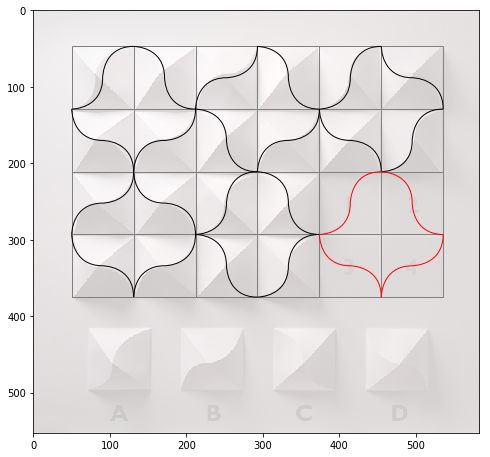

In [17]:
fig, ax = plt.subplots(figsize=(8, 8))


x0, y0 = 50, 47
width, height = 81, 82

tx0 = Affine2D().scale(width, height) + Affine2D().translate(x0, y0)

ax.imshow(im, alpha=.25)


for x in range(6):
    for y in range(4):
        ax.add_patch(Rectangle((x0 + width * x, y0 + height * y), width, height, linewidth=1, edgecolor='gray', facecolor='none'))


for i, z in enumerate(puzzle):
    y = i // 6
    x = i % 6
    
    if z == ' ':
        continue
        
    tx = tx0 + Affine2D().translate(width * x, height * y)
    patch = PathPatch(tx.transform_path(paths[z]), fc='none', ec='black')
    ax.add_patch(patch)
    
for (x, y), z in zip([(4, 2), (4, 3), (5, 2), (5, 3)], 'ADCB'):
    tx = tx0 + Affine2D().translate(width * x, height * y)
    patch = PathPatch(tx.transform_path(paths[z]), fc='none', ec='red')
    ax.add_patch(patch)